In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

### Carregamento e junção dos dados

In [2]:
resultados_escola_pd = pd.read_csv('../dados/TS_RESULTADO_ESCOLA.csv', delimiter=';')
questionario_escola_pd = pd.read_csv('../dados/TS_QUEST_ESCOLA.csv', delimiter=';')
join_columns = ['ID_PROVA_BRASIL', 'ID_UF', 'ID_MUNICIPIO', 'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'ID_ESCOLA']
escolas_info_pd = pd.merge(questionario_escola_pd, resultados_escola_pd, on=join_columns, how='outer')

### Limpeza inicial dos dados

In [3]:
escolas_info_pd['TX_RESP_Q050'] = escolas_info_pd['TX_RESP_Q050'].map({'A': 3, 'B': 2, 'C': 1, 'D': 0})
escolas_info_pd['TX_RESP_Q050'] = escolas_info_pd['TX_RESP_Q050'].fillna(-1)
escolas_info_pd['MEDIA_LP'] = escolas_info_pd['MEDIA_LP'].str.strip().str.replace(',', '.').str.replace('^$', '-1').astype(float)

### Distribuição das médias em Língua Portuguesa

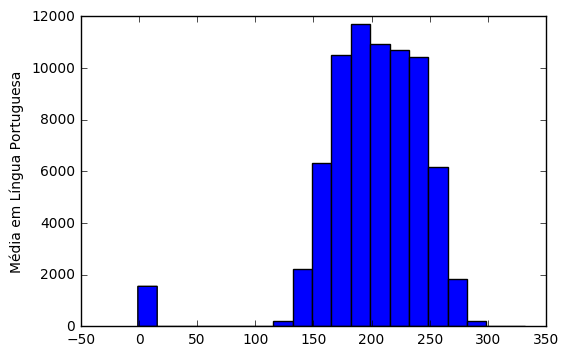

In [4]:
plt.hist(escolas_info_pd['MEDIA_LP'], bins=20)
plt.ylabel('Média em Língua Portuguesa')
plt.show()

### Gráfico de correlação entre Qualidade da Biblioteca e Média em Língua Portuguesa

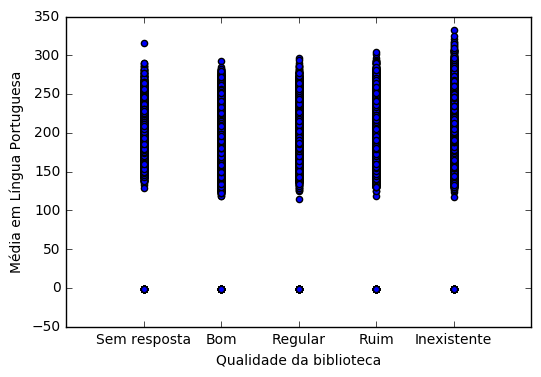

In [5]:
# Qualidade da biblioteca, de acordo com o dicionario de dados, encontra-se no campo TX_RESP_Q050
plt.scatter(escolas_info_pd['TX_RESP_Q050'], escolas_info_pd['MEDIA_LP'])
plt.xlabel('Qualidade da biblioteca')
plt.ylabel('Média em Língua Portuguesa')
plt.xticks([-1, 0, 1, 2, 3], ['Sem resposta', 'Bom', 'Regular', 'Ruim', 'Inexistente'])
plt.show()